In [2]:
import networkx as nx
import matplotlib.pyplot as plt

with open("inf-USAir97.txt", "r") as f:
    lines = f.readlines()

#ignore comment lines and header
edges = []
for line in lines:
    if line.startswith("%"):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        u, v, weight = int(parts[0]), int(parts[1]), float(parts[2])
        edges.append((u, v, weight))

In [3]:
#create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [4]:
# 1. How many nodes and edges does it have? How many connected components does it have?
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_connected_components = nx.number_connected_components(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Number of connected components: {num_connected_components}")

Number of nodes: 332
Number of edges: 2127
Number of connected components: 1


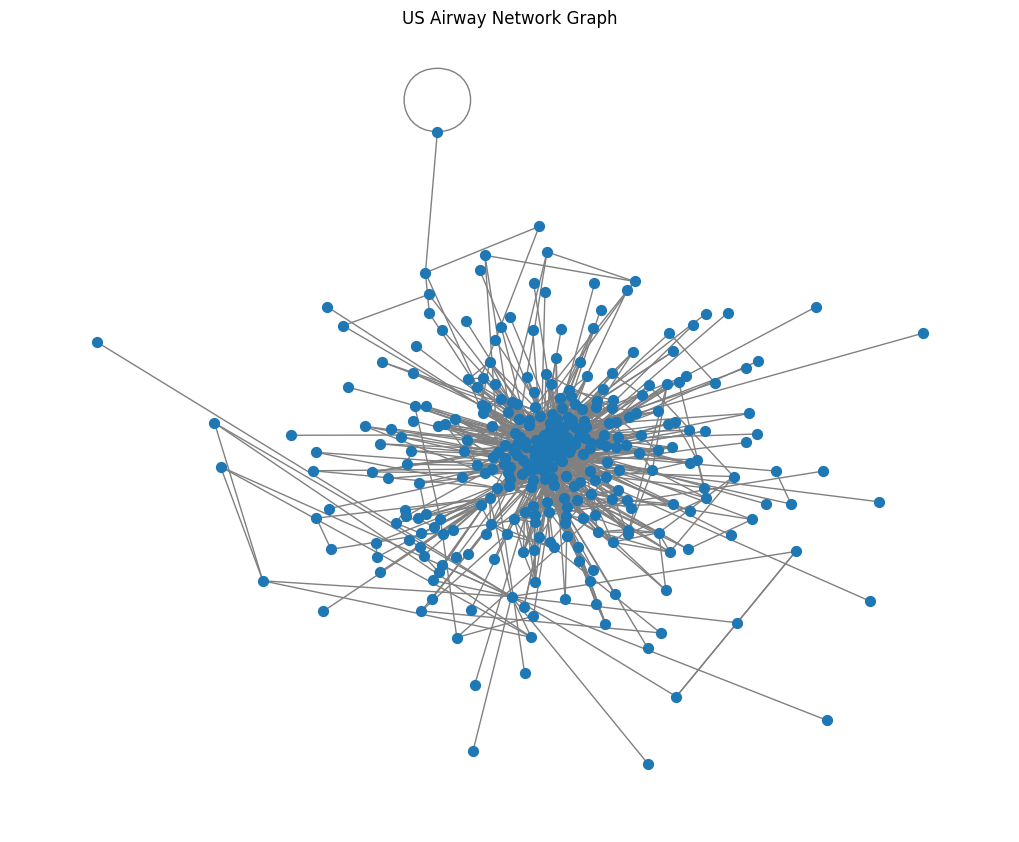

In [5]:
# 2. Generate a plot for the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=50, with_labels=False, edge_color='gray')
plt.title("US Airway Network Graph")
plt.show()

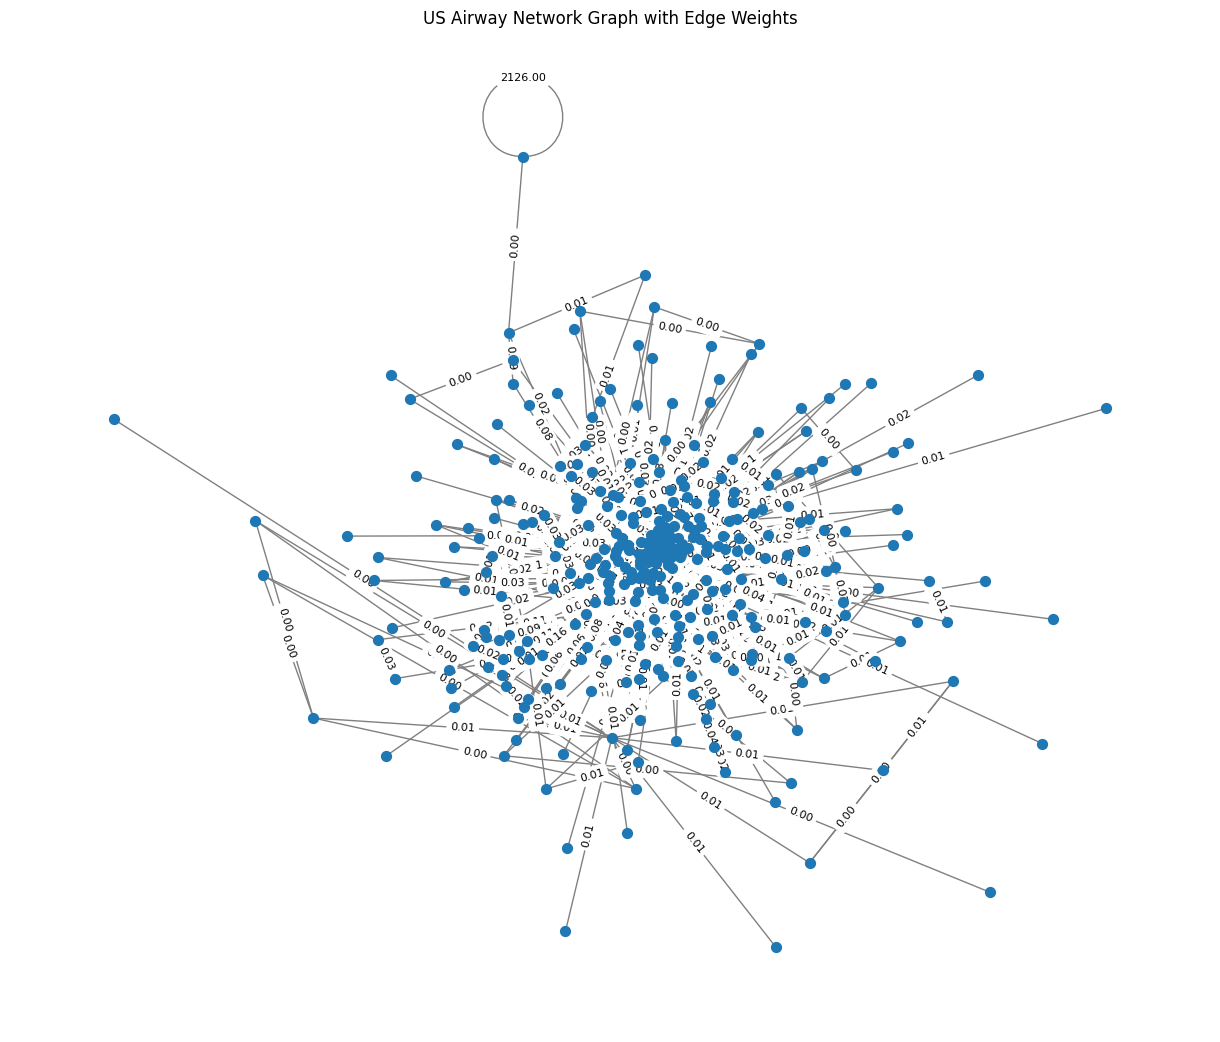

In [8]:
# 2. (option2) Generate a plot for the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=50, with_labels=False, edge_color='gray')

# include edge weights
edge_labels = {(u, v): f"{data['weight']:.2f}" for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("US Airway Network Graph with Edge Weights")
plt.show()

In [6]:
# 3. Make the source node ‘251’ and targe node ‘91’. What is the value of the max flow? What is the value of the min-cut?
source, target = 251, 91

#convert to a directed graph for flow computation
G_directed = nx.DiGraph()
for u, v, weight in edges:
    G_directed.add_edge(u, v, capacity=weight)
    G_directed.add_edge(v, u, capacity=weight)

flow_value, flow_dict = nx.maximum_flow(G_directed, source, target)
cut_value, partition = nx.minimum_cut(G_directed, source, target)

print(f"Max Flow Value: {flow_value}")
print(f"Min Cut Value: {cut_value}")

Max Flow Value: 0.362
Min Cut Value: 0.362
